In [1]:
#import libraries
import seaborn as sns

from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt # plotting

import pandas as pd 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


## Load Data

In [2]:
file1 = "/Users/ayadav/Downloads/term-deposit-marketing-2020.csv"

In [3]:
df = pd.read_csv(file1)

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [51]:
df.y.value_counts()

0    37104
1     2896
Name: y, dtype: int64

In [9]:
df.shape

(40000, 14)

In [10]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

## Data Visualization

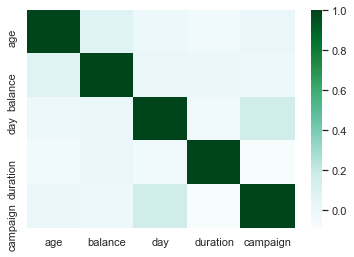

In [11]:
sns.heatmap(df.corr(), cmap='BuGn')

### to visualize all the columns in heatmap, need to label the categorical values and them to number

In [12]:
### label encode the categorical values and convert them to numbers 
le = preprocessing.LabelEncoder()
le.fit(df['job'].astype(str))
df['job'] = le.transform(df['job'].astype(str))

le.fit(df['marital'].astype(str))
df['marital'] = le.transform(df['marital'].astype(str))


le.fit(df['education'].astype(str))
df['education'] = le.transform(df['education'].astype(str))


le.fit(df['default'].astype(str))
df['default'] = le.transform(df['default'].astype(str))


le.fit(df['housing'].astype(str))
df['housing'] = le.transform(df['housing'].astype(str))



le.fit(df['loan'].astype(str))
df['loan'] = le.transform(df['loan'].astype(str))


le.fit(df['contact'].astype(str))
df['contact'] = le.transform(df['contact'].astype(str))


le.fit(df['month'].astype(str))
df['month'] = le.transform(df['month'].astype(str))


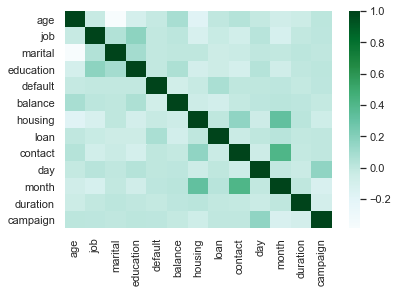

In [13]:
sns.heatmap(df.corr(), cmap='BuGn')

## checking null values

In [14]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

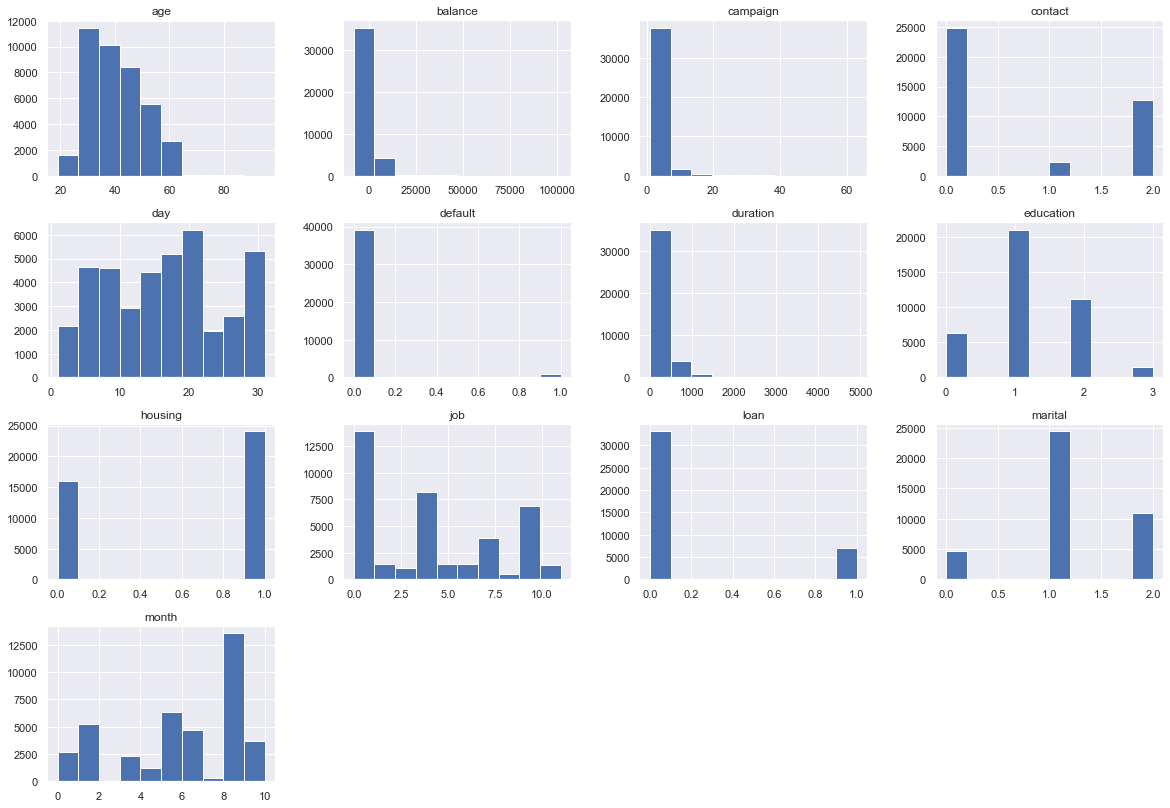

In [15]:
df.hist(figsize=(20,14))
plt.show()

In [16]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

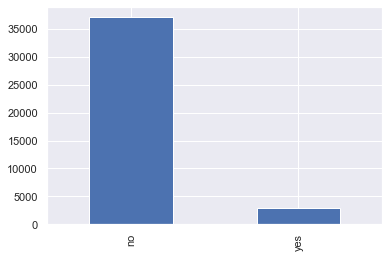

In [17]:
target = df['y']
target.value_counts().plot.bar()

### Data looks pretty imbalance, first we will run the pycaret model on default data sets and hypertune the best model with defult datasets to check the accuracy of model

##  Machine Learning

In [18]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Separate out the features and targets
features = df.drop(columns='y')
targets = pd.DataFrame(df['y'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32000, 13)
(8000, 13)
(32000, 1)
(8000, 1)


## Pycaret Module

In [19]:
#load the pycaret module
from pycaret.classification import *
data = df.sample(frac=0.95, random_state=486)
data_unseen = df.drop(df.index)
df.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (38000, 14)
Unseen Data For Predictions: (0, 14)


In [20]:
from pycaret.classification import *
exp_name = setup(data = data,  target = 'y',session_id=123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"no: 0, yes: 1"
3,Original Data,"(38000, 14)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [21]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.9372,0.9427,0.3644,0.6102,0.4554,0.4244,0.4408,1.9688
1,Light Gradient Boosting Machine,0.9372,0.9464,0.4021,0.5985,0.4799,0.4479,0.4585,0.1801
2,CatBoost Classifier,0.9371,0.9483,0.3943,0.5975,0.4746,0.4427,0.4537,7.3440
3,Extreme Gradient Boosting,0.9354,0.9407,0.4138,0.5729,0.4803,0.4469,0.4537,3.7955
4,Linear Discriminant Analysis,0.9339,0.9291,0.4339,0.5537,0.4858,0.4511,0.4553,0.0948
5,Ridge Classifier,0.9324,0.0000,0.1509,0.6384,0.2428,0.2214,0.2869,0.0143
6,Logistic Regression,0.9322,0.8897,0.2225,0.5829,0.3205,0.2924,0.3311,0.1575
7,Extra Trees Classifier,0.9317,0.9172,0.2193,0.5711,0.3162,0.2877,0.3250,0.3707
8,Random Forest Classifier,0.9315,0.8949,0.2408,0.5616,0.3365,0.3065,0.3376,0.1157
9,Ada Boost Classifier,0.9304,0.9285,0.3207,0.5306,0.3994,0.3648,0.3781,0.5221


### Split data into train and test datasets

In [22]:
X = df.drop(['y'], axis=1)

y = df['y']
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


## Light Gradient boosting Model with default parameter 

In [23]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [24]:
lgb = LGBMClassifier()

In [25]:
from sklearn.model_selection import GridSearchCV
n_estimators=[100,500,1000]
learning_rate=[0.01,0.1,1]
max_depth=[2,3,5]
num_leaves = [8,27, 125]
params2={'n_estimators':n_estimators,'learning_rate':learning_rate,'max_depth':max_depth,'num_leaves':num_leaves}
grid_lgb=GridSearchCV(lgb,param_grid=params2)

In [26]:
### label encode the categorical values and convert them to numbers 
le = preprocessing.LabelEncoder()
le.fit(df['job'].astype(str))
df['job'] = le.transform(df['job'].astype(str))

le.fit(df['marital'].astype(str))
df['marital'] = le.transform(df['marital'].astype(str))


le.fit(df['education'].astype(str))
df['education'] = le.transform(df['education'].astype(str))


le.fit(df['default'].astype(str))
df['default'] = le.transform(df['default'].astype(str))


le.fit(df['housing'].astype(str))
df['housing'] = le.transform(df['housing'].astype(str))



le.fit(df['loan'].astype(str))
df['loan'] = le.transform(df['loan'].astype(str))


le.fit(df['contact'].astype(str))
df['contact'] = le.transform(df['contact'].astype(str))


le.fit(df['month'].astype(str))
df['month'] = le.transform(df['month'].astype(str))


In [27]:
grid_lgb.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_dep

### Light Gradient boosting Model with best parameter

In [28]:
grid_lgb.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'num_leaves': 8}

In [29]:
X = df.drop(['y'], axis=1)

y = df['y']
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [30]:
lgbclf=LGBMClassifier(learning_rate=0.01,max_depth=5,n_estimators=1000, num_leaves = 8)
lgbclf.fit(X,y)
print(lgbclf.score(X,y))
print(lgbclf.score(X_train,y_train))
print(lgbclf.score(X_test,y_test))


0.941175
0.941455223880597
0.9406060606060606


## Feature Selection of imbalanced datasets

In [28]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
X = df.drop(['y'], axis=1)

y = df['y']
# define feature selection
fs = SelectKBest(score_func=f_classif, k=13)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(40000, 13)


In [29]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data
X = df.drop(['y'], axis=1)

y = df['y']
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[1.645e+01 1.056e+01 3.658e+01 5.658e+01 1.721e+00 3.659e+01 1.184e+02
 3.855e+01 3.239e+02 1.649e+00 1.340e+02 1.080e+04 6.523e+01]
[[  1   2   9 261]
 [  1   2   9 151]
 [  1   2   9  76]
 [  1   2   9  92]
 [  0   2   9 198]]


### Now we will balance the data through upscaling and then compare the accuracy between balanced and unbalanced data with best model

(26800, 13)
>10 0.928 (0.001)
>50 0.938 (0.002)
>100 0.938 (0.002)
>500 0.936 (0.002)
>1000 0.935 (0.002)


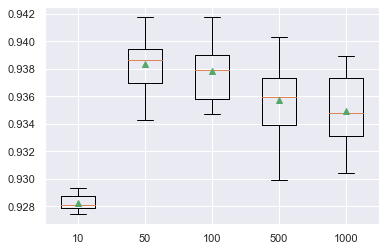

In [30]:
# evaluate lightgbm algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
# Splitting data into training and testing
from sklearn.model_selection import train_test_split
import lightgbm as lgb

# Separate out the features and targets
X = df.drop(columns='y')
y = pd.DataFrame(df['y'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(X_train.shape)
# define the model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
from matplotlib import pyplot
 
 
# get a list of models to evaluate
def get_models():
	models = dict()
	trees = [10, 50, 100, 500, 1000]
	for n in trees:
		models[str(n)] = LGBMClassifier(n_estimators=n)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


In [31]:
# Separate out the features and targets
X = df.drop(columns='y')
y = pd.DataFrame(df['y'])


### label encode the categorical values and convert them to numbers 
le = preprocessing.LabelEncoder()
le.fit(df['job'].astype(str))
df['job'] = le.transform(df['job'].astype(str))

le.fit(df['marital'].astype(str))
df['marital'] = le.transform(df['marital'].astype(str))


le.fit(df['education'].astype(str))
df['education'] = le.transform(df['education'].astype(str))


le.fit(df['default'].astype(str))
df['default'] = le.transform(df['default'].astype(str))


le.fit(df['housing'].astype(str))
df['housing'] = le.transform(df['housing'].astype(str))



le.fit(df['loan'].astype(str))
df['loan'] = le.transform(df['loan'].astype(str))


le.fit(df['contact'].astype(str))
df['contact'] = le.transform(df['contact'].astype(str))


le.fit(df['month'].astype(str))
df['month'] = le.transform(df['month'].astype(str))

le.fit(df['y'].astype(str))
df['y'] = le.transform(df['y'].astype(str))


In [32]:
from sklearn.utils import resample

# Separate input features and target
y = df.y
X = df.drop('y', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
No = X[X.y==0]
Yes = X[X.y==1]

# upsample minority
termdeposit_upsampled = resample(Yes,
                          replace=True, # sample with replacement
                          n_samples=len(No), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([No, termdeposit_upsampled])

# check new class counts
upsampled.y.value_counts()

   

1    27837
0    27837
Name: y, dtype: int64

In [33]:
upsampled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
14764,48,11,1,1,0,300,0,1,0,16,7,52,8,0
11535,54,9,1,1,0,3846,1,1,2,19,8,216,2,0
7450,45,7,1,1,0,1041,1,0,2,29,10,238,3,0
4990,42,3,0,1,0,2974,1,0,2,21,10,187,5,0
4602,34,1,1,0,0,500,1,0,2,20,10,324,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,28,0,2,1,0,460,1,0,2,26,10,741,6,1
33080,22,2,2,1,0,3982,0,0,0,20,0,206,1,1
19018,53,1,1,1,0,-8,0,0,0,5,1,794,1,1
31364,30,8,1,2,0,8089,1,0,0,18,9,232,2,1


### Load pycaret model on above balance datasets

In [34]:
#load the pycaret module
from pycaret.classification import *
data = upsampled.sample(frac=0.95, random_state=486)
data_unseen = upsampled.drop(upsampled.index)
upsampled.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (52890, 14)
Unseen Data For Predictions: (0, 14)


In [35]:
from pycaret.classification import *
exp_name = setup(data = data,  target = 'y',session_id=123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(52890, 14)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [36]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.9846,0.9998,0.9986,0.9714,0.9848,0.9691,0.9695,0.4957
1,Random Forest Classifier,0.9727,0.9983,0.9984,0.9495,0.9734,0.9453,0.9466,0.1147
2,Decision Tree Classifier,0.9671,0.9671,0.9989,0.9394,0.9682,0.9343,0.9362,0.1201
3,Extreme Gradient Boosting,0.9473,0.9804,0.9902,0.9120,0.9495,0.8945,0.8979,4.9975
4,CatBoost Classifier,0.9394,0.9760,0.9826,0.9046,0.9420,0.8789,0.8822,8.4310
5,Light Gradient Boosting Machine,0.9294,0.9704,0.9775,0.8919,0.9327,0.8589,0.8629,0.2221
6,K Neighbors Classifier,0.9010,0.9520,0.9851,0.8434,0.9087,0.8019,0.8136,0.0630
7,Gradient Boosting Classifier,0.8886,0.9485,0.9149,0.8693,0.8915,0.7772,0.7783,2.8825
8,Ada Boost Classifier,0.8688,0.9327,0.8730,0.8659,0.8694,0.7376,0.7377,0.8073
9,Ridge Classifier,0.8559,0.0000,0.8304,0.8751,0.8521,0.7117,0.7127,0.0193


>50 0.918 (0.002)
>100 0.932 (0.002)
>500 0.965 (0.001)
>1000 0.974 (0.001)


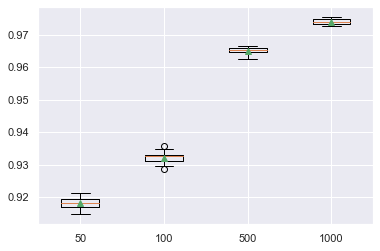

In [37]:
# get a list of models to evaluate
X = upsampled.drop(['y'], axis=1)
y = pd.DataFrame(upsampled['y'])
def get_models():
	models = dict()
	trees = [ 50, 100, 500, 1000]
	for n in trees:
		models[str(n)] = LGBMClassifier(n_estimators=n)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model,X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


In [38]:
lgb = LGBMClassifier()

In [39]:
from sklearn.model_selection import GridSearchCV
n_estimators=[100,500,1000]
learning_rate=[0.01,0.1,1]
max_depth=[2,3,5]
num_leaves = [8,27, 125]
params2={'n_estimators':n_estimators,'learning_rate':learning_rate,'max_depth':max_depth,'num_leaves':num_leaves}
grid_lgb=GridSearchCV(lgb,param_grid=params2)

In [40]:
grid_lgb.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_dep

In [41]:
grid_lgb.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 8}

In [44]:
X = upsampled.drop(['y'], axis=1)

y = upsampled['y']
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [45]:
lgbclf=LGBMClassifier(learning_rate=0.1,max_depth=5,n_estimators=100, num_leaves = 8)
lgbclf.fit(X,y)
print(lgbclf.score(X,y))
print(lgbclf.score(X_train,y_train))
print(lgbclf.score(X_test,y_test))

0.9008334231418615
0.9014503632610386
0.8995809067653622


### Feature Selection on balanced dataset

In [46]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
X = upsampled.drop(['y'], axis=1)

y = upsampled['y']
# define feature selection
fs = SelectKBest(score_func=f_classif, k=13)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)
   

(55674, 13)


In [47]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data
X = upsampled.drop(['y'], axis=1)

y = upsampled['y']
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[4.943e+01 2.598e+01 1.255e+02 2.547e+02 4.705e+00 1.819e+02 6.055e+02
 1.986e+02 2.114e+03 4.588e+00 3.760e+02 2.645e+04 4.446e+02]
[[  0   0  52   8]
 [  1   2 216   2]
 [  1   2 238   3]
 [  1   2 187   5]
 [  1   2 324   1]]


### Age, default, house loan, day, month and campaign are important features for the client.  

In [48]:
upsampled.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

### Accuracy with LGBM model went down from 94%(for imbalanced datasets) to 89%(balanced datasets). 

In [94]:
df.loc[(df['y'] == 1) & (df['duration'] >=700)]

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
83,0,1,1,0,2343,1,0,2,5,10,1042,1,1
86,0,1,1,0,45,0,0,2,5,10,1467,1,1
87,3,1,1,0,1270,1,0,2,5,10,1389,1,1
388,8,1,2,0,830,1,1,2,6,10,1201,1,1
390,9,0,1,0,545,1,0,2,6,10,1030,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39820,4,2,1,0,804,0,0,0,1,8,1087,1,1
39823,0,2,1,0,-528,1,1,0,1,8,1144,2,1
39895,3,1,2,0,523,1,0,0,2,8,712,1,1
39925,3,2,2,0,4987,0,0,0,2,8,924,2,1


In [80]:
df['housing'].value_counts()

1    24031
0    15969
Name: housing, dtype: int64